In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image
import torch

c:\Users\victo\Documents\Projects\Master-Thesis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
model_id = "vikhyatk/moondream2"
revision = "2025-01-09"  # Pin to specific version
model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision,
    torch_dtype=torch.float16, attn_implementation="flash_attention_2", device_map={"": "cuda"}
)
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)

OSError: cannot load library 'libvips-42.dll': error 0x7e.  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libvips-42.dll'

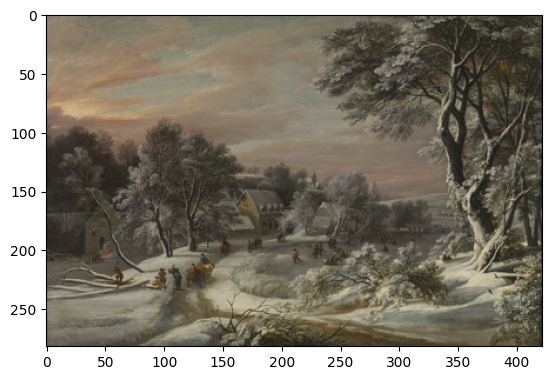

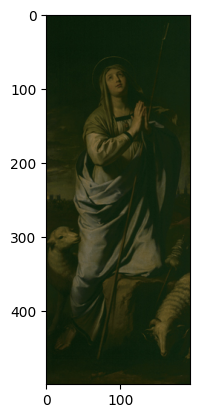

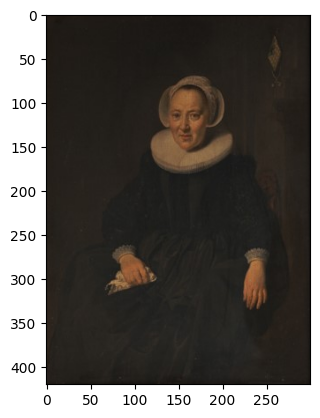

In [6]:
image = Image.open('../../private_data/local_images/1.jpg')
# Show the image which we are going to generate a caption for
plt.imshow(image)

images = []
for name in ["1", "21", "1818"]:
  images.append(Image.open(f'../../private_data/local_images/{name}.jpg'))
# Show the image which we are going to generate a caption for
for image in images:
  plt.imshow(image)
  plt.show()

In [4]:
plt.figure(figsize=(20, 20))
plt.imshow(image)

caption = model.caption(image, length="short")["caption"]

for obj in objects:
  detections = model.detect(image, obj)["objects"]
  for detection in detections:
    x_min, y_min, x_max, y_max = detection
    # The values are in % of the image width/height, so we need to multiply by the actual width/height
    x_min, y_min, x_max, y_max = x_min * image.width, y_min * image.height, x_max * image.width, y_max * image.height
    plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', lw=2))
    plt.gca().text(x_min, y_min, obj, color='red', fontsize=12, ha='left', va='bottom')
plt.axis('off')


plt.show()

NameError: name 'model' is not defined